# Pre-processing and Training

## Importing the packages and data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/adre9/Springboard 2024/Springboard_2024_GH/Capstone Project 2/Notebooks/Capstone 2 Data")

In [3]:
df = pd.read_csv('df.csv')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(297940, 10)

In [5]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [6]:
df = df.copy()

In [7]:
cat_cols = ['airline', 'source_city', 'departure_time', 'stops', 
              'arrival_time', 'destination_city', 'class']
num_cols = ['duration','days_left','price']

## Encoding the data

This will be done manually for each categorical column

**Airline**

In [8]:
print(sorted(df['airline'].unique()))

['AirAsia', 'Air_India', 'Go_First', 'Indigo', 'SpiceJet', 'Vistara']


In [9]:
df['airline'] = df['airline'].replace({'AirAsia':1, 'Air_India':2, 'Go_First':3,
                                      'Indigo':4, 'SpiceJet':5, 'Vistara':6})
df['airline'].unique()

array([5, 1, 6, 3, 4, 2], dtype=int64)

**Departure and Arrival times**

In [10]:
print(df['arrival_time'].unique())

['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


In [11]:
df['arrival_time'] = df['arrival_time'].replace({'Early_Morning':1,'Morning':2,'Afternoon':3,
                                                 'Evening':4,'Night':5,'Late_Night':6})

df['departure_time'] = df['departure_time'].replace({'Early_Morning':1,'Morning':2,'Afternoon':3,
                                                 'Evening':4,'Night':5,'Late_Night':6})

In [12]:
print(df['arrival_time'].unique(), df['departure_time'].unique())

[5 2 1 3 4 6] [4 1 2 3 5 6]


**Source and Destination cities**

In [13]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [14]:
df['source_city'] = df['source_city'].replace({'Bangalore':1,'Chennai':2,'Delhi':3,
                                              'Hyderabad':4,'Kolkata':5,'Mumbai':6})

df['destination_city'] = df['destination_city'].replace({'Bangalore':1,'Chennai':2,'Delhi':3,
                                              'Hyderabad':4,'Kolkata':5,'Mumbai':6})

In [15]:
print(df['source_city'].unique(), df['destination_city'].unique())

[3 6 1 5 4 2] [6 1 5 4 2 3]


**Stops**

In [16]:
df['stops'].unique()

array(['0', '1', '2+'], dtype=object)

In [17]:
df['stops'] = df['stops'].replace({'0':1,'1':2,'2+':3})

In [18]:
df['stops'].unique()

array([1, 2, 3], dtype=int64)

**Class**

In [19]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [20]:
df['class'] = df['class'].replace({'Economy':1,'Business':2})

In [21]:
df['class'].unique()

array([1, 2], dtype=int64)

## Checking out the correlation

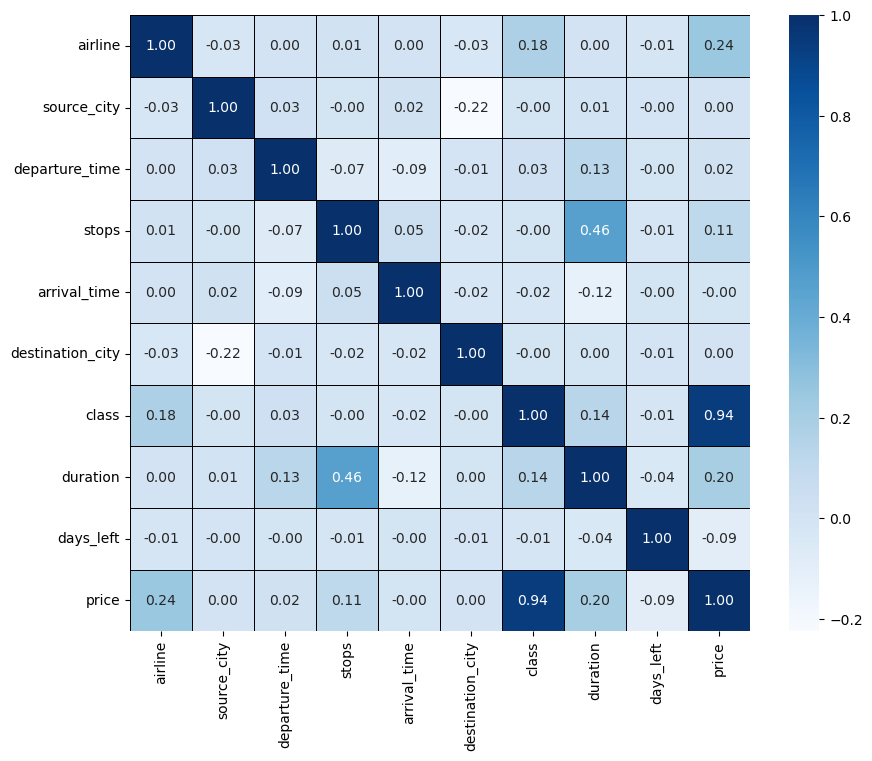

In [22]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='black', cmap='Blues')
plt.show()

Flight class has the biggest correlation with pric with the next highest being airline at 0.24 likely due to Vistara and Air India having the highest prices while there is no clear correlation between the other 4 airlines as seen during the EDA step.

In [23]:
# Defining the features and target variables
X_temp = df.drop(columns='price')
y = df['price']

## Scaling the data

In [24]:
# Scaling the data
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

## Splitting the data

In [11]:
# Let's take a look at how much possible training data there may be 
# Before deciding how much to split
test_size_pcts = [0.1,0.15,0.2,0.25,0.3]

for i in test_size_pcts:
    print(f'{int(i*100)}%: {i * len(X)}')

10%: 29794.0
15%: 44691.0
20%: 59588.0
25%: 74485.0
30%: 89382.0


In [25]:
# Let's split the data into 80-10-10 (training-testing-validation)
# X_temp, y_temp being placeholders
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
# Splitting the data into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
print(f'X_train: {(len(X_train)/len(df))*100}%')
print(f'X_test: {(len(X_test)/len(df))*100}%')
print(f'X_val: {(len(X_val)/len(df))*100}%')

X_train: 80.0%
X_test: 10.0%
X_val: 10.0%


In [29]:
# Saving the split data variables for the next step
%store X_train X_test X_val y_train y_test y_val

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'X_val' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'y_val' (Series)
